In [1]:
#Load in Libraries
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import seaborn as sn

# to make the plots display inline 
# %matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import chi2, mutual_info_classif, SelectKBest
import time

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

from sklearn.metrics import (
    accuracy_score, 
    precision_score,
    recall_score,
    roc_auc_score,
    f1_score,
    confusion_matrix,
    classification_report, ConfusionMatrixDisplay
)
from sklearn.metrics import roc_curve, auc, roc_auc_score


import warnings
warnings.filterwarnings('ignore')

Prepare a data quality plan for the dataset. Mark down all the features where there 
are potential problems or data quality issues. Propose solutions to deal with the problems 
identified. Explain why did you choose one solution over potentially many other. It is very 
important to provide justification for your thinking in this part and to list potential solutions, 
including the solution that will be implemented to clean the data. In particular, pay attention 
to missing data and carefully address this issue.

#### How to perform  data cleaning? 
- Identify and remove rows with single values. If there is no variation in the feature, it is most likely to be useless for modelling. 
- Fix structural errors (no typographical errors and inconsistencies in upper or lower case for categorical features).
- Handle missing values 
- Remove columns with constant or too many values.
- Filter _unwanted_ outliers. 
- Remove unwanted (duplicate / irrelevant) observations.  
- Check for invalid / inconsistent data and rectify where possible
- Check for logical integrity of the data (if applicable)
- Derive new features (if applicable) by combining or performing appropriate operations on the existing features

Now, let's get started...

In [2]:
#read in the data and make it a data frame
df = pd.read_csv('pulsar_19346861.csv')
df.head(5)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,131.343750,48.714961,0.132338,-0.317174,4.332776,26.258452,6.700987,47.082259,0.0
1,115.390625,44.670886,0.284449,0.292062,2.625418,NaN,7.975588,71.184726,0.0
2,118.554688,43.542330,0.490395,0.750824,2.608696,21.672981,9.008464,83.680090,0.0
3,96.515625,39.196019,0.515466,1.294247,3.037625,20.028978,8.175599,74.813375,0.0
4,128.031250,50.701014,-0.080792,-0.205665,2.106187,14.923089,9.806013,117.603166,0.0


In [3]:
df.dtypes
#every figure is a float so it makes it easier for us to work with except for target_class here we convert it to a category

 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                     float64
dtype: object

## 2. Check for duplicates

In [4]:
print('Number of duplicate (excluding first) rows in the table is: ', df.duplicated().sum())

Number of duplicate (excluding first) rows in the table is:  0


## 3. Check for cardinality 

In [5]:
# A way to get the number of unique values for all features
df.nunique()
#If there had been a column with only one distinct value we could remove it as it would provide us with no benefit

 Mean of the integrated profile                   6356
 Standard deviation of the integrated profile     9992
 Excess kurtosis of the integrated profile        8590
 Skewness of the integrated profile              10000
 Mean of the DM-SNR curve                         6259
 Standard deviation of the DM-SNR curve           9045
 Excess kurtosis of the DM-SNR curve              9998
 Skewness of the DM-SNR curve                     9496
target_class                                         2
dtype: int64

## 4. Check for outliers + missing values

In [6]:
# Clean the column names to remove white space after the name or in the name
df.columns = df.columns.str.strip()

df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [7]:
df.isnull().sum()

Mean of the integrated profile                     0
Standard deviation of the integrated profile       0
Excess kurtosis of the integrated profile       1410
Skewness of the integrated profile                 0
Mean of the DM-SNR curve                           0
Standard deviation of the DM-SNR curve           953
Excess kurtosis of the DM-SNR curve                0
Skewness of the DM-SNR curve                     502
target_class                                       0
dtype: int64

In [8]:
#% of missing data for all features
100 * (df.isnull().sum()/df.shape[0])

Mean of the integrated profile                   0.00
Standard deviation of the integrated profile     0.00
Excess kurtosis of the integrated profile       14.10
Skewness of the integrated profile               0.00
Mean of the DM-SNR curve                         0.00
Standard deviation of the DM-SNR curve           9.53
Excess kurtosis of the DM-SNR curve              0.00
Skewness of the DM-SNR curve                     5.02
target_class                                     0.00
dtype: float64

Excesskurtosisoftheintegratedprofile is missing 14.1% of entries 
StandarddeviationoftheDM-SNRcurve is missing 9.53% of entries 
SkewnessoftheDM-SNRcurve is missing 5.02% of entries 

In [9]:
df_raw = df.copy()

In [10]:
params = {'axes.titlesize':'20',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}
plt.rcParams.update(params)

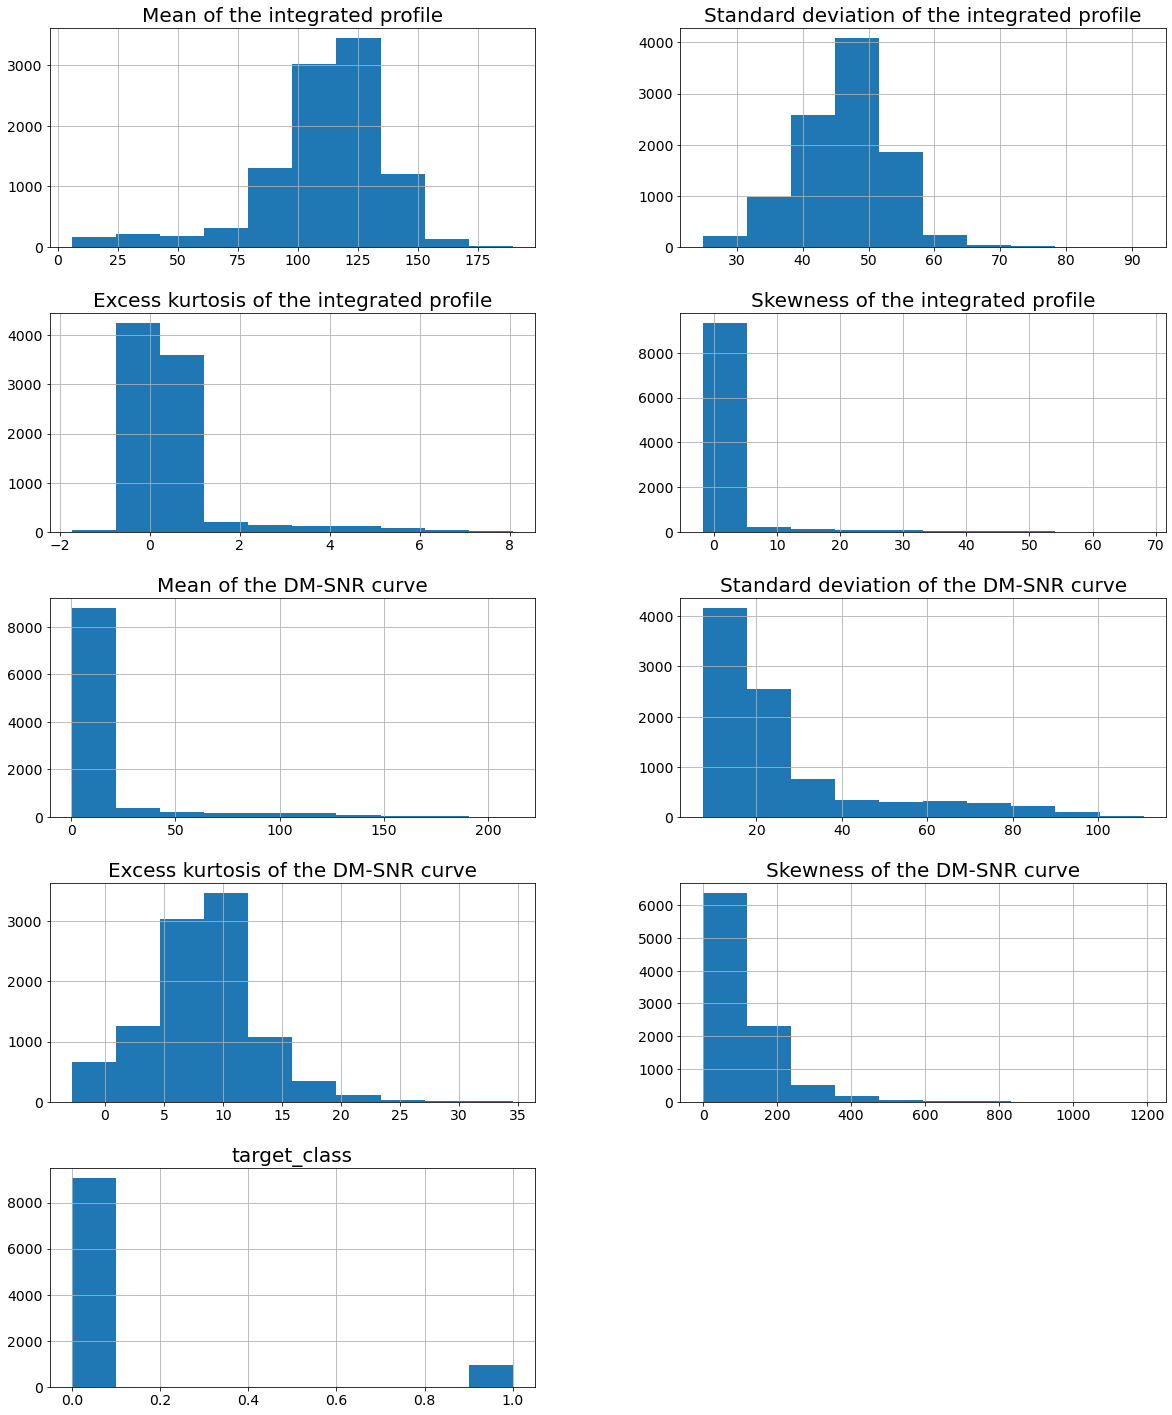

In [11]:
df.hist(figsize=(20, 25), layout=(5,2));
plt.grid(b=True, which='major', color='#666666', linestyle='-')

If there is a normal distribution with a long tail I will be using the log1P to help with distribution. They may require more standardisation after this.

Mean of the integrated profile- Normal ... standardise

Standard deviation of the integrated profile- Normal ... standardise

Excess kurtosis of the integrated profile- Long tail ... normalise

Skewness of the integrated profile- Long tail ... normalise

Mean of the DM-SNR curve- Long tail ... normalise

Standard deviation of the DM-SNR curve- Long tail  ... normalise

Excess kurtosis of the DM-SNR curve- Long tail  ... normalise

Skewness of the DM-SNR curve- Long tail  ... normalise

### Summary of the issues in data and potential handling strategies

    
| Feature                 | Data Quality Issue         | Handling Strategy         |
|-------------------------|----------------------      |------------------------   |
|Meanoftheintegratedprofile (float64)                          |   None|Keep as is|
Standarddeviationoftheintegratedprofile (float64)             | None              | Keep as is     
Excesskurtosisoftheintegratedprofile (float64)       | Missing Values (14.1%)  | Investigate cause of error and how many rows are affected. If invalid data and only few rows affected, drop rows|
Skewnessoftheintegratedprofile (float64)             | None       | Keep as is  | 
MeanoftheDM-SNRcurve (float64)                 | None | Keep as is|   
StandarddeviationoftheDM-SNRcurve (float64)                | Missing Values (9.53%) |  Investigate cause of error and how many rows are affected. If invalid data and only few rows affected, drop rows|
ExcesskurtosisoftheDM-SNRcurve (float64)    | None | Keep as is|
SkewnessoftheDM-SNRcurve (float64)         | Missing values (5.02%) | Investigate rows affected, consider imputation|
target_class  (category)                  | None | Keep as is |


In [12]:
df[df['Excess kurtosis of the integrated profile'].isnull()] 

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
10,125.257812,42.472831,NaN,0.564218,2.019231,17.725342,10.483950,NaN,0.0
13,39.648438,52.806337,NaN,3.389053,142.984114,56.764702,-0.458445,-0.045532,1.0
28,112.601562,48.450738,NaN,0.168201,2.193980,14.412085,9.455081,114.347528,0.0
30,130.921875,53.922052,NaN,-0.479785,3.859532,22.468715,8.091709,71.402795,0.0
35,119.390625,40.343493,NaN,0.314199,4.082776,24.364752,6.722123,47.878040,0.0
...,...,...,...,...,...,...,...,...,...
9944,132.906250,46.975299,NaN,0.011302,4.546823,22.242852,6.061675,41.939357,0.0
9947,89.171875,53.370771,NaN,0.183686,115.096990,65.067503,-0.503614,-0.855274,0.0
9958,79.984375,37.289196,NaN,2.713387,2.304348,NaN,8.868254,87.026308,0.0
9968,131.218750,54.612261,NaN,-0.495175,1.860368,12.322237,11.812542,NaN,0.0


In [13]:
df[df['Skewness of the DM-SNR curve'].notnull()]

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,131.343750,48.714961,0.132338,-0.317174,4.332776,26.258452,6.700987,47.082259,0.0
1,115.390625,44.670886,0.284449,0.292062,2.625418,NaN,7.975588,71.184726,0.0
2,118.554688,43.542330,0.490395,0.750824,2.608696,21.672981,9.008464,83.680090,0.0
3,96.515625,39.196019,0.515466,1.294247,3.037625,20.028978,8.175599,74.813375,0.0
4,128.031250,50.701014,-0.080792,-0.205665,2.106187,14.923089,9.806013,117.603166,0.0
...,...,...,...,...,...,...,...,...,...
9995,75.828125,32.395531,1.159565,5.941325,1.859532,15.129773,10.491788,128.353375,0.0
9996,118.640625,54.485052,0.276859,-0.322176,2.446488,14.527208,8.997733,107.939924,0.0
9997,80.945312,37.525472,0.808218,2.654715,3.172241,16.740657,8.339343,92.092994,0.0
9998,108.265625,51.698115,0.253485,0.068016,1.859532,12.469240,11.135808,170.288108,0.0


There is no pattern in the missing data.

In [14]:
StandarddeviationoftheDMSNRcurve=df[df['Standard deviation of the DM-SNR curve'].isnull()] 
StandarddeviationoftheDMSNRcurve

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
1,115.390625,44.670886,0.284449,0.292062,2.625418,NaN,7.975588,71.184726,0.0
7,132.906250,53.772588,0.060075,-0.071764,1.014214,NaN,15.549608,279.764368,0.0
16,51.765625,28.011572,4.106637,25.279592,25.711538,NaN,2.420031,4.672227,1.0
36,109.789062,45.378556,0.043877,0.142993,4.564381,NaN,6.211841,40.419846,0.0
40,132.484375,61.074108,-0.078900,-0.683707,52.300167,NaN,0.988108,-0.845140,0.0
...,...,...,...,...,...,...,...,...,...
9958,79.984375,37.289196,NaN,2.713387,2.304348,NaN,8.868254,87.026308,0.0
9965,102.851562,41.525235,0.338228,0.611358,2.072742,NaN,10.259489,137.009944,0.0
9967,121.882812,48.942827,0.127893,-0.145795,2.431438,NaN,9.063521,108.617372,0.0
9977,100.609375,42.396793,0.080003,0.504986,0.537625,NaN,21.788808,495.349690,0.0


In [15]:
df[df['Standard deviation of the DM-SNR curve'].notnull()]

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,131.343750,48.714961,0.132338,-0.317174,4.332776,26.258452,6.700987,47.082259,0.0
2,118.554688,43.542330,0.490395,0.750824,2.608696,21.672981,9.008464,83.680090,0.0
3,96.515625,39.196019,0.515466,1.294247,3.037625,20.028978,8.175599,74.813375,0.0
4,128.031250,50.701014,-0.080792,-0.205665,2.106187,14.923089,9.806013,117.603166,0.0
5,94.507812,37.280398,0.879222,2.381901,2.441472,13.720785,9.237694,119.629139,0.0
...,...,...,...,...,...,...,...,...,...
9995,75.828125,32.395531,1.159565,5.941325,1.859532,15.129773,10.491788,128.353375,0.0
9996,118.640625,54.485052,0.276859,-0.322176,2.446488,14.527208,8.997733,107.939924,0.0
9997,80.945312,37.525472,0.808218,2.654715,3.172241,16.740657,8.339343,92.092994,0.0
9998,108.265625,51.698115,0.253485,0.068016,1.859532,12.469240,11.135808,170.288108,0.0


There is no pattern in the missing data.

In [16]:
df[df['Skewness of the DM-SNR curve'].isnull()]

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
10,125.257812,42.472831,NaN,0.564218,2.019231,17.725342,10.483950,NaN,0.0
55,155.539062,60.130574,-0.924501,0.063190,145.953177,89.308096,-0.482839,NaN,0.0
63,103.164062,45.964453,0.301567,0.266179,1.739130,15.886265,11.170136,NaN,0.0
100,113.070312,49.034137,0.391063,0.227022,0.811037,10.397746,18.193799,NaN,0.0
106,155.898438,50.891864,-0.293039,-0.219576,0.678930,10.138288,18.839142,NaN,0.0
...,...,...,...,...,...,...,...,...,...
9918,101.937500,42.695094,NaN,0.698060,3.057692,21.902089,8.082175,NaN,0.0
9938,111.664062,52.891587,0.365273,-0.026960,143.611204,83.997353,-0.905549,NaN,0.0
9968,131.218750,54.612261,NaN,-0.495175,1.860368,12.322237,11.812542,NaN,0.0
9984,104.210938,58.043848,0.854737,-0.257755,144.381271,47.361258,-0.157823,NaN,0.0


In [17]:
df[df['Skewness of the DM-SNR curve'].notnull()]

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,131.343750,48.714961,0.132338,-0.317174,4.332776,26.258452,6.700987,47.082259,0.0
1,115.390625,44.670886,0.284449,0.292062,2.625418,NaN,7.975588,71.184726,0.0
2,118.554688,43.542330,0.490395,0.750824,2.608696,21.672981,9.008464,83.680090,0.0
3,96.515625,39.196019,0.515466,1.294247,3.037625,20.028978,8.175599,74.813375,0.0
4,128.031250,50.701014,-0.080792,-0.205665,2.106187,14.923089,9.806013,117.603166,0.0
...,...,...,...,...,...,...,...,...,...
9995,75.828125,32.395531,1.159565,5.941325,1.859532,15.129773,10.491788,128.353375,0.0
9996,118.640625,54.485052,0.276859,-0.322176,2.446488,14.527208,8.997733,107.939924,0.0
9997,80.945312,37.525472,0.808218,2.654715,3.172241,16.740657,8.339343,92.092994,0.0
9998,108.265625,51.698115,0.253485,0.068016,1.859532,12.469240,11.135808,170.288108,0.0


There is no pattern in terms of missing data in the three features.

In [18]:
df.isnull().sum()

Mean of the integrated profile                     0
Standard deviation of the integrated profile       0
Excess kurtosis of the integrated profile       1410
Skewness of the integrated profile                 0
Mean of the DM-SNR curve                           0
Standard deviation of the DM-SNR curve           953
Excess kurtosis of the DM-SNR curve                0
Skewness of the DM-SNR curve                     502
target_class                                       0
dtype: int64

So my main issue is missing values but I can't seem to figure out a pattern to them so I can either delete the rows or impute the missing values and I would be losing 14.1% of the data but since we have a huge amount of data I feel we can still work with what we have as the data seems to be missing completely at random and in cases where there is no pattern the data should be deleted which when it is avoidable should be avoided. In this circumstance deleting the rows with missing values seems to be smartest decision. I could not see any correlation between the the columns when certain ones are null. https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/ is a good website I used and I found the values were MCAR so it was best advised that I delete the rows with missing values.

As quoted from this paper https://www.paultwin.com/wp-content/uploads/Lodder_1140873_Paper_Imputation.pdf " If more than
25% of the data is missing and researchers apply modern
treatments to impute the missing data, then they should
always compare the results of their subsequent analyses
with the results they would have obtained if they had
used complete case analysis. If the results differ, then
we can conclude this to be the result of the imputation
strategy and this makes it less likely that the results will
be publishable."

In [19]:
df.shape

(10000, 9)

In [20]:
df.isnull().sum()

Mean of the integrated profile                     0
Standard deviation of the integrated profile       0
Excess kurtosis of the integrated profile       1410
Skewness of the integrated profile                 0
Mean of the DM-SNR curve                           0
Standard deviation of the DM-SNR curve           953
Excess kurtosis of the DM-SNR curve                0
Skewness of the DM-SNR curve                     502
target_class                                       0
dtype: int64

In [21]:
# some feature missing values exist, we can see above.
# we also know that all features is in numeric format.
# So, fill the missing values with mean
df = df.fillna(df.mean())

In [22]:
df.isnull().sum()

Mean of the integrated profile                  0
Standard deviation of the integrated profile    0
Excess kurtosis of the integrated profile       0
Skewness of the integrated profile              0
Mean of the DM-SNR curve                        0
Standard deviation of the DM-SNR curve          0
Excess kurtosis of the DM-SNR curve             0
Skewness of the DM-SNR curve                    0
target_class                                    0
dtype: int64

Now, No missing values exist in dataset

Below I am applying logP1 to the necessary features

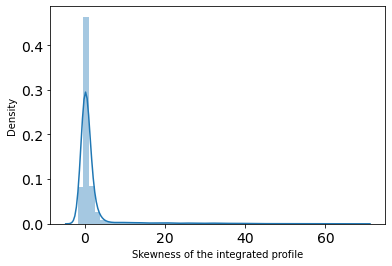

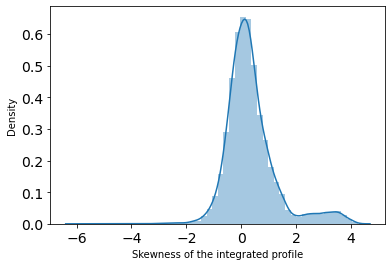

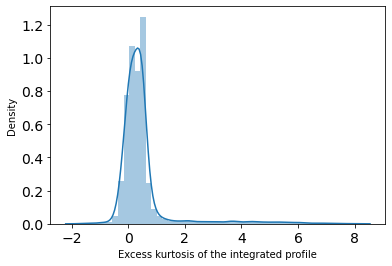

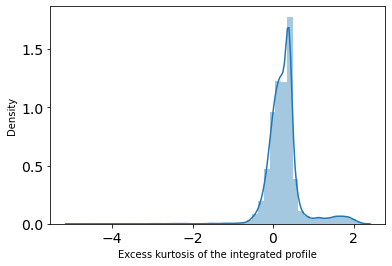

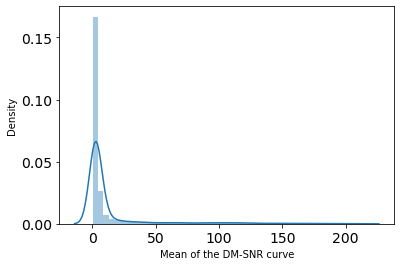

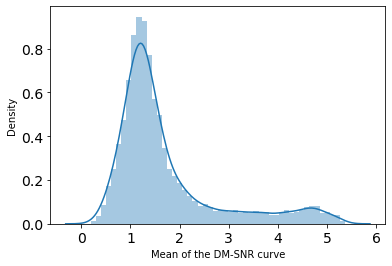

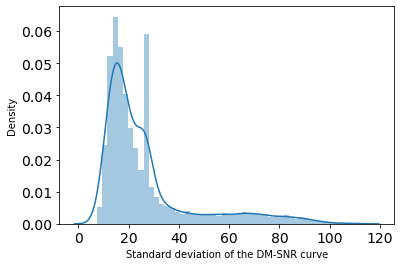

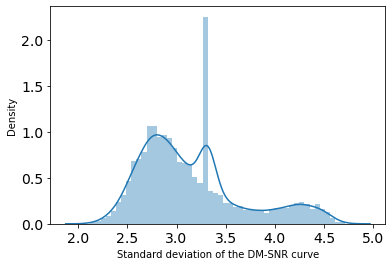

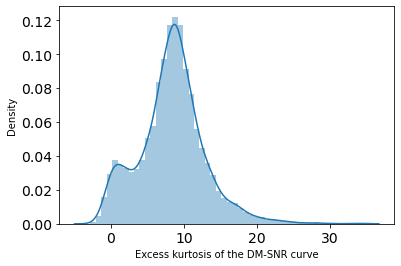

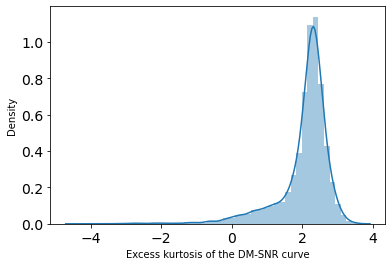

In [23]:
plt.figure()
sn.distplot(df['Skewness of the integrated profile'])
plt.show()
plt.figure()
sn.distplot(np.log1p(df["Skewness of the integrated profile"]))
plt.show()

plt.figure()
sn.distplot(df['Excess kurtosis of the integrated profile'])
plt.show()
plt.figure()
sn.distplot( np.log1p(df["Excess kurtosis of the integrated profile"]))
plt.show()

plt.figure()
sn.distplot(df['Mean of the DM-SNR curve'])
plt.show()
plt.figure()
sn.distplot(np.log1p(df["Mean of the DM-SNR curve"]))
plt.show()


plt.figure()
sn.distplot(df['Standard deviation of the DM-SNR curve'])
plt.show()
plt.figure()
sn.distplot(np.log1p(df["Standard deviation of the DM-SNR curve"]))
plt.show()


plt.figure()
sn.distplot(df['Excess kurtosis of the DM-SNR curve'])
plt.show()
plt.figure()
sn.distplot(np.log1p(df["Excess kurtosis of the DM-SNR curve"]))
plt.show()

I now have a much easier to work with and visualise set of data for the chosen features I will now continue with the rest

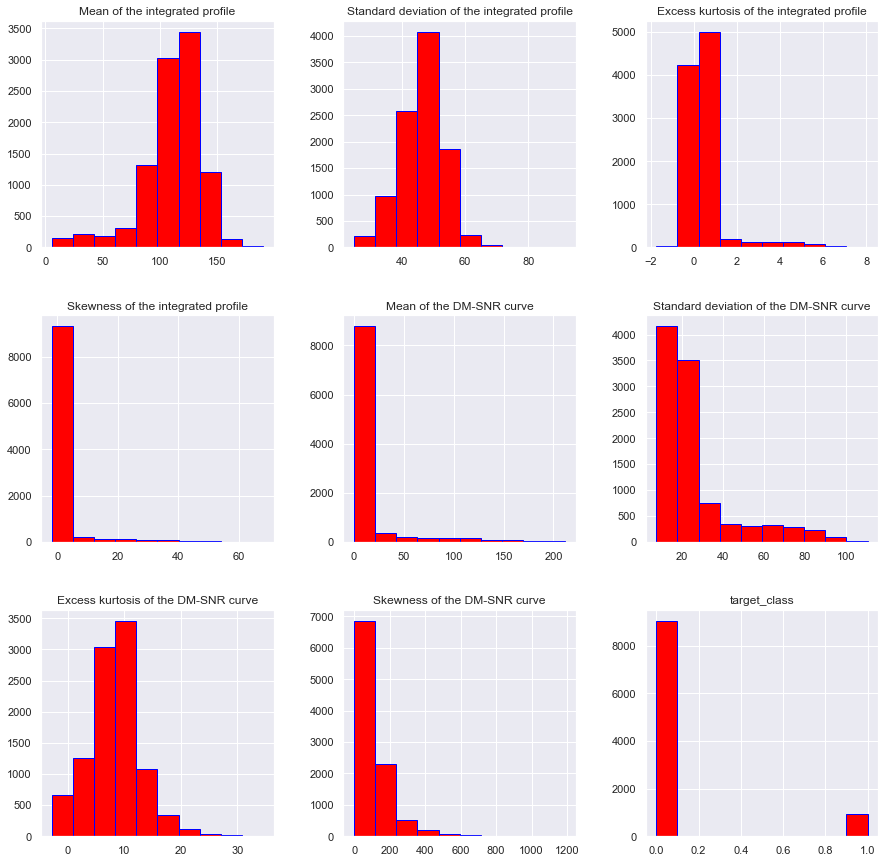

In [24]:
sns.set(font_scale=1)
df.select_dtypes(include=[int, float]).hist(bins=10, figsize=(15,15), color = "red", edgecolor='blue')
plt.show()

I draw the distribution of each features above by using histogram, we can observe the distribution of each feature.


## Task 2

*One approach to standardizing input variables in the presence of outliers is to ignore the outliers from the calculation of the mean and standard deviation, then use the calculated values to scale the variable. This is called robust standardization or robust data scaling.*

*I'll use the standarization rather than normalization from sklearn*

In [25]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,131.343750,48.714961,0.132338,-0.317174,4.332776,26.258452,6.700987,47.082259,0.0
1,115.390625,44.670886,0.284449,0.292062,2.625418,26.516261,7.975588,71.184726,0.0
2,118.554688,43.542330,0.490395,0.750824,2.608696,21.672981,9.008464,83.680090,0.0
3,96.515625,39.196019,0.515466,1.294247,3.037625,20.028978,8.175599,74.813375,0.0
4,128.031250,50.701014,-0.080792,-0.205665,2.106187,14.923089,9.806013,117.603166,0.0


In [26]:
# standarization the data features
std = StandardScaler()  
X_std = std.fit_transform(df.drop('target_class', axis = 1)) 

In [27]:
df_std = pd.DataFrame(X_std, columns=df.columns[:-1])
df_std['target'] = df['target_class']
df_std.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target
0,0.787956,0.323695,-0.352098,-0.337687,-0.284208,-1.376014e-02,-0.357018,-0.553809,0.0
1,0.173169,-0.268466,-0.200788,-0.242311,-0.341509,-4.361278e-15,-0.077079,-0.325505,0.0
2,0.295103,-0.433717,0.004073,-0.170492,-0.342071,-2.585028e-01,0.149771,-0.207147,0.0
3,-0.554219,-1.070134,0.029012,-0.085419,-0.327675,-3.462490e-01,-0.033151,-0.291134,0.0
4,0.660302,0.614506,-0.564106,-0.320230,-0.358936,-6.187682e-01,0.324936,0.114180,0.0


Now, our dataset is in normalize form. we can see above dataframe.

## Task 3

In [28]:
def target_distribution(df_final):
    plt.figure(figsize=(17, 7))

    plt.subplot(1, 2, 1)

    df_final['target'].value_counts().plot(kind = 'bar', color = ['green', 'red'])

    plt.xlabel('Score Category', fontsize=16)
    plt.ylabel('Frequency of Target', fontsize=16)
    plt.xticks(size = 12)
    plt.yticks(size = 12)
    plt.title('Frequency Distribution of Target', fontsize=18)


    plt.subplot(1,2,2)

    df_final['target'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',shadow=True, colors = ['green', 'red'],
                                        textprops={'fontsize':15, 'color':'white'})
    plt.ylabel('target', fontsize=16)
    plt.title('Proportional Distribution of Target', fontsize=18)
    plt.legend()
    plt.show()

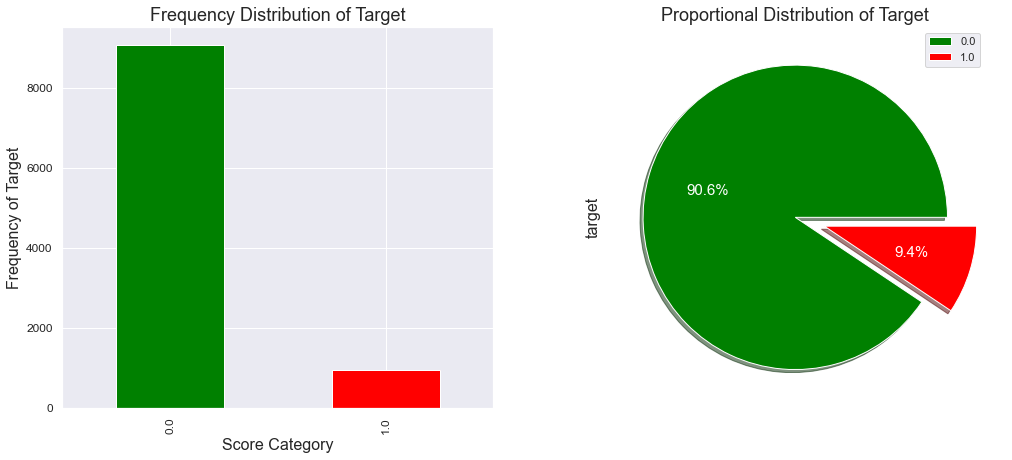

In [29]:
target_distribution(df_std)

> I check the distribution of each target in which 0 is dominent as compare to 1. `91%` is not pulsar stars and just `9%`is pulsar star.

> Clearly, we can see that our dataset is imbalanced form. Therefore, accuracy evaluation is not good when dataset is in imbalanced form, accuracy is biased on majority class.

> We will check the different performance metrics Precison, Recall, F1-score, Auc score on testing data and see how models perform according these performance metrics.

> For imbalanced data then like ROC/AUC perform better in evaluating the model performance.

## Task 4

In [30]:
X = df_std.drop('target', axis = 1) # input features
y = df_std['target'] # output feature

In [31]:
# split the dataset for 75% traning and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (7500, 8)
Testing Data Shape: (2500, 8)


In [32]:
# cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10)

In [33]:
def evalute_model(model, model_name, X_train, X_test, y_train, y_test):
    '''Method to train and predict the test data, and calculate evalution metrices'''
    
    # train the model
    model.fit(X_train, y_train)
    
    # AUC
    y_score = model.predict_proba(X_test)
    fpr, tpr, th = roc_curve(y_test, y_score[:,1])
    roc_auc = auc(fpr, tpr)

    
    # predict
    y_pred_test = model.predict(X_test)
    
    scores = cross_val_score(model, X_test, y_test, cv=kfold)
    
    # calculate the accuracy
    result = {}
    result['Model_name'] = model_name
    
    result['Accuracy'] = accuracy_score(y_test, y_pred_test)
    result['Precision'] = precision_score(y_test, y_pred_test)
    result['Recall'] = recall_score(y_test, y_pred_test)
    result['F1'] = f1_score(y_test, y_pred_test)
    result['Auc_Roc'] = roc_auc
    result['Cross Validation Result'] = np.mean(scores)
    result['Confusion Matrix'] = confusion_matrix(y_test, y_pred_test)
    result['Classification Report'] = classification_report(y_test, y_pred_test)
    print(model_name, "\t\t\tdone.")
    
#     print(result)
    return result

In [34]:
results = []
# DT
results.append(evalute_model(DecisionTreeClassifier(), 'DT', X_train, X_test, y_train, y_test))

# KNN
results.append(evalute_model(KNeighborsClassifier(), 'KNN', X_train, X_test, y_train, y_test))

# SVM linear kernel
results.append(evalute_model(SVC(kernel='linear', probability=True), 'SVM(linear)', X_train, X_test, y_train, y_test))

# SVM RBF kernel
results.append(evalute_model(SVC(kernel='rbf', probability=True), 'SVM(RBF)', X_train, X_test, y_train, y_test))

# SVM Ploy kernel
results.append(evalute_model(SVC(kernel='poly', probability=True), 'SVM(Poly)', X_train, X_test, y_train, y_test))

# SVM Sigmoid kernel
results.append(evalute_model(SVC(kernel='sigmoid', probability=True), 'SVM(Sigmoid)', X_train, X_test, y_train, y_test))

DT 			done.
KNN 			done.
SVM(linear) 			done.
SVM(RBF) 			done.
SVM(Poly) 			done.
SVM(Sigmoid) 			done.


In [35]:
models_res = pd.DataFrame(results)
models_res

,Model_name,Accuracy,Precision,Recall,F1,Auc_Roc,Cross Validation Result,Confusion Matrix,Classification Report
0,DT,0.9624,0.794118,0.807692,0.800847,0.893034,0.9712,"[[2217, 49], [45, 189]]",precision recall f1-score ...
1,KNN,0.9764,0.939698,0.799145,0.863741,0.942798,0.9752,"[[2254, 12], [47, 187]]",precision recall f1-score ...
2,SVM(linear),0.9768,0.944444,0.799145,0.865741,0.975441,0.9768,"[[2255, 11], [47, 187]]",precision recall f1-score ...
3,SVM(RBF),0.9788,0.959391,0.807692,0.877030,0.955660,0.9780,"[[2258, 8], [45, 189]]",precision recall f1-score ...
4,SVM(Poly),0.9752,0.947917,0.777778,0.854460,0.964740,0.9744,"[[2256, 10], [52, 182]]",precision recall f1-score ...
5,SVM(Sigmoid),0.8748,0.317972,0.294872,0.305987,0.880600,0.8752,"[[2118, 148], [165, 69]]",precision recall f1-score ...


In [36]:
def plot_confusion_matrix(cm):
    ax = sns.heatmap(cm, annot=True, fmt="", annot_kws={"size": 16}) # font size
    ax.set_xticklabels(["not pulsar stars","pulsar stars"])
    ax.set_yticklabels(["not pulsar stars","pulsar stars"])
    plt.show()
def plot_classification_report(cr):
    print(cr)

DT :: Confusion Matrix


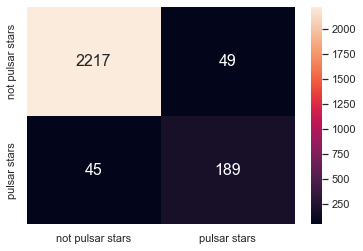

Classification Report
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      2266
         1.0       0.79      0.81      0.80       234

    accuracy                           0.96      2500
   macro avg       0.89      0.89      0.89      2500
weighted avg       0.96      0.96      0.96      2500


KNN :: Confusion Matrix


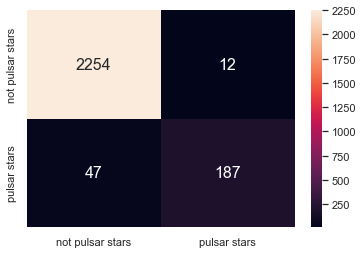

Classification Report
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2266
         1.0       0.94      0.80      0.86       234

    accuracy                           0.98      2500
   macro avg       0.96      0.90      0.93      2500
weighted avg       0.98      0.98      0.98      2500


SVM(linear) :: Confusion Matrix


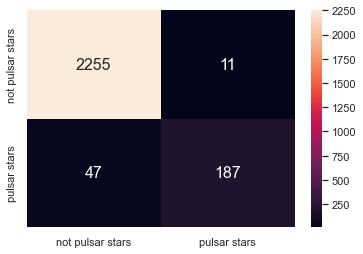

Classification Report
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2266
         1.0       0.94      0.80      0.87       234

    accuracy                           0.98      2500
   macro avg       0.96      0.90      0.93      2500
weighted avg       0.98      0.98      0.98      2500


SVM(RBF) :: Confusion Matrix


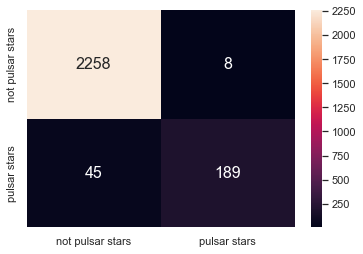

Classification Report
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2266
         1.0       0.96      0.81      0.88       234

    accuracy                           0.98      2500
   macro avg       0.97      0.90      0.93      2500
weighted avg       0.98      0.98      0.98      2500


SVM(Poly) :: Confusion Matrix


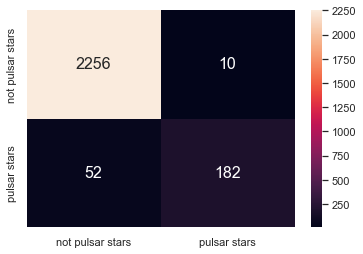

Classification Report
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2266
         1.0       0.95      0.78      0.85       234

    accuracy                           0.98      2500
   macro avg       0.96      0.89      0.92      2500
weighted avg       0.97      0.98      0.97      2500


SVM(Sigmoid) :: Confusion Matrix


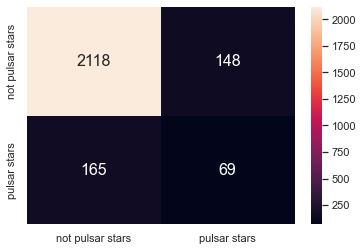

Classification Report
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      2266
         1.0       0.32      0.29      0.31       234

    accuracy                           0.87      2500
   macro avg       0.62      0.61      0.62      2500
weighted avg       0.87      0.87      0.87      2500




In [37]:
for i in range(len(models_res)):
    print(models_res.iloc[:,0][i], ":: Confusion Matrix")
    plot_confusion_matrix(models_res.iloc[:,-2][i])
    print("Classification Report")
    plot_classification_report(models_res.iloc[:,-1][i])
    print()

In [66]:
models_res.iloc[:,:7]

,Model_name,Accuracy,Precision,Recall,F1,Auc_Roc,Cross Validation Result
0,DT,0.9624,0.794118,0.807692,0.800847,0.893034,0.9712
1,KNN,0.9764,0.939698,0.799145,0.863741,0.942798,0.9752
2,SVM(linear),0.9768,0.944444,0.799145,0.865741,0.975441,0.9768
3,SVM(RBF),0.9788,0.959391,0.807692,0.877030,0.955660,0.9780
4,SVM(Poly),0.9752,0.947917,0.777778,0.854460,0.964740,0.9744
5,SVM(Sigmoid),0.8748,0.317972,0.294872,0.305987,0.880600,0.8752


> We get the results of different classifiers in which we can see above table SVM linear and rbf better from others models.

> SVM on Poly and Sigmoid are not well performing. Sigmoid kernel giving worst results from other kernels.

> Therefore, we can choose any model SVM with linear or RBF kernel for final model use.

## Task 5

In [53]:
# use filter method to get the selected features ==> Correlation with target feature
corr = abs(df_std.corr()['target'].drop('target')).to_frame().reset_index().rename(
    {'index':'features','target':'correlation'}, axis=1)
corr.sort_values(by='correlation', ascending=False)

,features,correlation
2,Excess kurtosis of the integrated profile,0.737634
3,Skewness of the integrated profile,0.712737
0,Mean of the integrated profile,0.680803
5,Standard deviation of the DM-SNR curve,0.489532
4,Mean of the DM-SNR curve,0.417424
6,Excess kurtosis of the DM-SNR curve,0.399831
1,Standard deviation of the integrated profile,0.374810
7,Skewness of the DM-SNR curve,0.253114


In [56]:
X_train = pd.DataFrame(X_train, columns=df.columns[:-1])
X_test = pd.DataFrame(X_test, columns=df.columns[:-1])

In [59]:
# we will use the top 3 and bottom 3 features 
selected_features = ['Excess kurtosis of the integrated profile','Skewness of the integrated profile',
                    'Mean of the integrated profile','Excess kurtosis of the DM-SNR curve','Standard deviation of the integrated profile',
                    'Skewness of the DM-SNR curve']

X_train_corr = X_train[selected_features]
X_test_corr = X_test[selected_features]

In [60]:
X_train_corr.head()

,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the integrated profile,Excess kurtosis of the DM-SNR curve,Standard deviation of the integrated profile,Skewness of the DM-SNR curve
3776,-5.005683e-01,-0.264054,0.977029,-0.353925,-0.428276,-0.547010
7365,-1.987875e-15,-0.167819,0.908384,0.089460,-0.662227,-0.253267
2071,-3.610965e-01,-0.168321,0.208093,0.524179,-0.828531,0.225637
381,-5.316986e-01,-0.291474,0.801504,0.878905,0.593507,0.914134
2360,6.897175e-02,-0.182526,-0.401877,-1.551647,-0.355975,-1.000390


In [62]:
results = []

# SVM linear kernel
results.append(evalute_model(SVC(kernel='linear', probability=True), 'SVM(linear)', X_train_corr, X_test_corr, y_train, y_test))

# SVM RBF kernel
results.append(evalute_model(SVC(kernel='rbf', probability=True), 'SVM(RBF)', X_train_corr, X_test_corr, y_train, y_test))

# SVM Ploy kernel
results.append(evalute_model(SVC(kernel='poly', probability=True), 'SVM(Poly)', X_train_corr, X_test_corr, y_train, y_test))

# SVM Sigmoid kernel
results.append(evalute_model(SVC(kernel='sigmoid', probability=True), 'SVM(Sigmoid)', X_train_corr, X_test_corr, y_train, y_test))

SVM(linear) 			done.
SVM(RBF) 			done.
SVM(Poly) 			done.
SVM(Sigmoid) 			done.


In [63]:
models_res_filter = pd.DataFrame(results)
models_res_filter

,Model_name,Accuracy,Precision,Recall,F1,Auc_Roc,Cross Validation Result,Confusion Matrix,Classification Report
0,SVM(linear),0.9756,0.943590,0.786325,0.857809,0.973516,0.9756,"[[2255, 11], [50, 184]]",precision recall f1-score ...
1,SVM(RBF),0.9776,0.954082,0.799145,0.869767,0.954674,0.9784,"[[2257, 9], [47, 187]]",precision recall f1-score ...
2,SVM(Poly),0.9724,0.950820,0.743590,0.834532,0.964194,0.9752,"[[2257, 9], [60, 174]]",precision recall f1-score ...
3,SVM(Sigmoid),0.8892,0.389744,0.324786,0.354312,0.891153,0.8836,"[[2147, 119], [158, 76]]",precision recall f1-score ...


In [65]:
models_res_filter.iloc[:,:7]

,Model_name,Accuracy,Precision,Recall,F1,Auc_Roc,Cross Validation Result
0,SVM(linear),0.9756,0.943590,0.786325,0.857809,0.973516,0.9756
1,SVM(RBF),0.9776,0.954082,0.799145,0.869767,0.954674,0.9784
2,SVM(Poly),0.9724,0.950820,0.743590,0.834532,0.964194,0.9752
3,SVM(Sigmoid),0.8892,0.389744,0.324786,0.354312,0.891153,0.8836


On selected features, approx. same results (Linear) as compare to full features. 

## Task 6

In [67]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS

In [78]:
# Now we will get the select features through wrapper method backward elimination
# for each model we will chekc the subset of selected features
def select_features(model, k = 5):
    backward = SFS(model, n_features_to_select=k, direction="backward")
    backward.fit(X_train, y_train)
    feature_names = np.array(df.columns[:-1].tolist())
    selected_features = feature_names[backward.get_support()]
    print(f"Feature Selected for {model} ", selected_features)
    return selected_features

def subset_new_dataset(features):
    X_train_method_wrapper = X_train[features]
    X_test_method_wrapper = X_test[features]
    return X_train_method_wrapper, X_test_method_wrapper

In [107]:
models = [('DT', DecisionTreeClassifier()),('KNN',KNeighborsClassifier()),
         ('SVM(lin)', SVC(kernel='linear', probability=True)),('SVM(rbf)', SVC(kernel='rbf', probability=True)),
         ('SVM(poly)', SVC(kernel='poly', probability=True)),('SVM(sigmoid)', SVC(kernel='sigmoid', probability=True))]

In [80]:
store_train_test = []

In [81]:
for name,model in models:
    print("Model ::",name)
    selected_features = select_features(model, k=5)
    print()
    X_train_, X_test_ = subset_new_dataset(selected_features)
    store_train_test.append((X_train_, X_test_))

Model :: DT
Feature Selected for DecisionTreeClassifier()  ['Standard deviation of the integrated profile'
 'Excess kurtosis of the integrated profile'
 'Skewness of the integrated profile' 'Mean of the DM-SNR curve'
 'Standard deviation of the DM-SNR curve']

Model :: KNN
Feature Selected for KNeighborsClassifier()  ['Mean of the integrated profile'
 'Standard deviation of the integrated profile'
 'Excess kurtosis of the integrated profile'
 'Skewness of the integrated profile' 'Skewness of the DM-SNR curve']

Model :: SVM(lin)
Feature Selected for SVC(kernel='linear')  ['Standard deviation of the integrated profile'
 'Excess kurtosis of the integrated profile'
 'Skewness of the integrated profile' 'Mean of the DM-SNR curve'
 'Standard deviation of the DM-SNR curve']

Model :: SVM(rbf)
Feature Selected for SVC()  ['Mean of the integrated profile'
 'Standard deviation of the integrated profile'
 'Excess kurtosis of the integrated profile'
 'Skewness of the integrated profile'
 'Standar

> We get the subset of features by using backward elimination techniques.

> From above, we can see each model feature selection.

In [86]:
X_train_dt, X_test_dt = store_train_test[0]
X_train_knn, X_test_knn = store_train_test[1]
X_train_svm_lin, X_test_svm_lin = store_train_test[2]
X_train_svm_rbf, X_test_svm_rbf = store_train_test[3]
X_train_svm_poly, X_test_svm_poly = store_train_test[4]
X_train_svm_sigmoid, X_test_svm_sigmoid = store_train_test[5]

In [87]:
results = []
# DT
results.append(evalute_model(DecisionTreeClassifier(), 'DT', X_train_dt, X_test_dt, y_train, y_test))

# KNN
results.append(evalute_model(KNeighborsClassifier(), 'KNN', X_train_knn, X_test_knn, y_train, y_test))

# SVM linear kernel
results.append(evalute_model(SVC(kernel='linear', probability=True), 'SVM(linear)', X_train_svm_lin, X_test_svm_lin, y_train, y_test))

# SVM RBF kernel
results.append(evalute_model(SVC(kernel='rbf', probability=True), 'SVM(RBF)', X_train_svm_rbf, X_test_svm_rbf, y_train, y_test))

# SVM Ploy kernel
results.append(evalute_model(SVC(kernel='poly', probability=True), 'SVM(Poly)', X_train_svm_poly, X_test_svm_poly, y_train, y_test))

# SVM Sigmoid kernel
results.append(evalute_model(SVC(kernel='sigmoid', probability=True), 'SVM(Sigmoid)', X_train_svm_sigmoid, X_test_svm_sigmoid, y_train, y_test))

DT 			done.
KNN 			done.
SVM(linear) 			done.
SVM(RBF) 			done.
SVM(Poly) 			done.
SVM(Sigmoid) 			done.


In [88]:
models_res_wrapper = pd.DataFrame(results)
models_res_wrapper

,Model_name,Accuracy,Precision,Recall,F1,Auc_Roc,Cross Validation Result,Confusion Matrix,Classification Report
0,DT,0.9644,0.805907,0.816239,0.811040,0.897970,0.9656,"[[2220, 46], [43, 191]]",precision recall f1-score ...
1,KNN,0.9768,0.923077,0.820513,0.868778,0.940930,0.9760,"[[2250, 16], [42, 192]]",precision recall f1-score ...
2,SVM(linear),0.9760,0.943878,0.790598,0.860465,0.976447,0.9764,"[[2255, 11], [49, 185]]",precision recall f1-score ...
3,SVM(RBF),0.9776,0.954082,0.799145,0.869767,0.950494,0.9780,"[[2257, 9], [47, 187]]",precision recall f1-score ...
4,SVM(Poly),0.9744,0.956989,0.760684,0.847619,0.964890,0.9744,"[[2258, 8], [56, 178]]",precision recall f1-score ...
5,SVM(Sigmoid),0.9104,0.522727,0.491453,0.506608,0.931108,0.9008,"[[2161, 105], [119, 115]]",precision recall f1-score ...


In [89]:
models_res_wrapper.iloc[:,:7]

,Model_name,Accuracy,Precision,Recall,F1,Auc_Roc,Cross Validation Result
0,DT,0.9644,0.805907,0.816239,0.811040,0.897970,0.9656
1,KNN,0.9768,0.923077,0.820513,0.868778,0.940930,0.9760
2,SVM(linear),0.9760,0.943878,0.790598,0.860465,0.976447,0.9764
3,SVM(RBF),0.9776,0.954082,0.799145,0.869767,0.950494,0.9780
4,SVM(Poly),0.9744,0.956989,0.760684,0.847619,0.964890,0.9744
5,SVM(Sigmoid),0.9104,0.522727,0.491453,0.506608,0.931108,0.9008


## Task 7

In [96]:
print("FULL FEATURES RESULTS")
models_res.iloc[:,:7]

FULL FEATURES RESULTS


,Model_name,Accuracy,Precision,Recall,F1,Auc_Roc,Cross Validation Result
0,DT,0.9624,0.794118,0.807692,0.800847,0.893034,0.9712
1,KNN,0.9764,0.939698,0.799145,0.863741,0.942798,0.9752
2,SVM(linear),0.9768,0.944444,0.799145,0.865741,0.975441,0.9768
3,SVM(RBF),0.9788,0.959391,0.807692,0.877030,0.955660,0.9780
4,SVM(Poly),0.9752,0.947917,0.777778,0.854460,0.964740,0.9744
5,SVM(Sigmoid),0.8748,0.317972,0.294872,0.305987,0.880600,0.8752


In [97]:
print("FILTER METHOD FEATURES RESULTS")
models_res_filter.iloc[:,:7]

FILTER METHOD FEATURES RESULTS


,Model_name,Accuracy,Precision,Recall,F1,Auc_Roc,Cross Validation Result
0,SVM(linear),0.9756,0.943590,0.786325,0.857809,0.973516,0.9756
1,SVM(RBF),0.9776,0.954082,0.799145,0.869767,0.954674,0.9784
2,SVM(Poly),0.9724,0.950820,0.743590,0.834532,0.964194,0.9752
3,SVM(Sigmoid),0.8892,0.389744,0.324786,0.354312,0.891153,0.8836


In [98]:
print("WRAPPER METHOD FEATURES RESULTS")
models_res_wrapper.iloc[:,:7]

WRAPPER METHOD FEATURES RESULTS


,Model_name,Accuracy,Precision,Recall,F1,Auc_Roc,Cross Validation Result
0,DT,0.9644,0.805907,0.816239,0.811040,0.897970,0.9656
1,KNN,0.9768,0.923077,0.820513,0.868778,0.940930,0.9760
2,SVM(linear),0.9760,0.943878,0.790598,0.860465,0.976447,0.9764
3,SVM(RBF),0.9776,0.954082,0.799145,0.869767,0.950494,0.9780
4,SVM(Poly),0.9744,0.956989,0.760684,0.847619,0.964890,0.9744
5,SVM(Sigmoid),0.9104,0.522727,0.491453,0.506608,0.931108,0.9008


>> We can compare the results of features selection technique with full features.

>> Feature selection technques not giving more improvemets results as compare to on full features.

## Task 8

In [121]:
models

[('DT', DecisionTreeClassifier()),
 ('KNN', KNeighborsClassifier()),
 ('SVM(lin)', SVC(kernel='linear', probability=True)),
 ('SVM(rbf)', SVC(probability=True)),
 ('SVM(poly)', SVC(kernel='poly', probability=True)),
 ('SVM(sigmoid)', SVC(kernel='sigmoid', probability=True))]

In [117]:
def AUC_ROC(model):
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, thres = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    return fpr,tpr, auc

In [118]:
plot_res = []
for name, model in models:
    print("Model ::",name)
    clf = model.fit(X_train,y_train)
    fpr,tpr,auc = AUC_ROC(clf)
    plot_res.append((fpr,tpr,auc, name))

Model :: DT
Model :: KNN
Model :: SVM(lin)
Model :: SVM(rbf)
Model :: SVM(poly)
Model :: SVM(sigmoid)


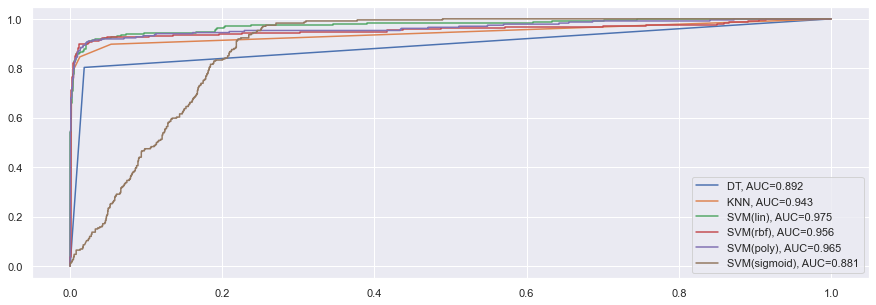

In [120]:
plt.figure(figsize=(15,5))
for fpr,tpr,auc,name in plot_res:
    plt.plot(fpr,tpr, label=f"{name}, AUC="+str(round(auc,3)))
    plt.legend(loc=4)

>>> We can see that SVM linear giving better auc score as compare to others,
>>> We can also see the curve of SVM linear.

### Task 9

> **Correlation of the various features with the target class**

>> We can evaluate the relationship between each feature and target using a correlation and selecting those features that have the strongest relationship with the target variable. The difference has to do with whether features are selected based on the target variable or not.

>> Correlation is a measure of the linear relationship of 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that the good variables are highly correlated with the target

>> When the y variable tends to increase as the x variable increases, we say there is a positive correlation between the variables. When the y variable tends to decrease as the x variable increases, we say there is a negative correlation between the variables.

> **feature selection and feature importance**

>> **Feature Selection**
>>> Feature Selection in python is the process where you automatically or manually select the features in the dataset that contribute most to your prediction variable or output in which you are interested.

>>> There are three types of feature selection: Wrapper methods (forward, backward, and stepwise selection), Filter methods (ANOVA, Pearson correlation, variance thresholding), and Embedded methods (Lasso, Ridge, Decision Tree)

>> **Feature Importance**
>>> Feature Importance is a score assigned to the features of a Machine Learning model that defines how “important” is a feature to the model's prediction. It can help in feature selection and we can get very useful insights about our data. We will show you how you can get it in the most common models of machine learning

>>> feature importance measures are used during or after training to explain the learned model

> **relative performance of different classifiers (different kernels in case of SVM) and different parameter settings w.r.t different evaluation measures**

>> We check the SVM model with different kernel in which Linear and RBF kernel giving better results as compare to other kernels.

>> Sigmoid kernel too worst kernel as compare to others.

> **effect of different ways of imputing missing values on the final performance of different classifiers.**

>> One of the biggest impact of Missing Data is, It can bias the results of the machine learning models or reduce the accuracy of the model. So, It is very important to handle missing values

>> In our Scenario all features is in continous format, so we fill the missing values with mean.